## Thomson Scattering Calculations for Plasmas with Magnetised Electrons, collected by a finite aperture

##### Jack Hare, May 2015 onwards

#### How to use this notebook
This note book is split into three sections: the functions necessary to calculate the spectral density function S(k,w), the parameters of the plasma for which the spectrum should be calculated, and the code necessary to make a pretty plot of the spectrum.

1. To run the code, first execute the first code cell (the grey box filled with text under the heading **Functions for calculating...**). To execute, click the cell, and press shift+enter, or select Cell>Run.
2. Then edit the plasma parameters and experimental set up in the next code cell down (**Plasma Parameters...**), and execute it as above. This may take some time. The little circle in the top right (next to where it says 'Python 2') will fill grey whilst this cell is executing. However, you can execute this cell and then step 3. straight away and they will execute in series.
3. To plot, execute the next code cell (**Plotting**) - nothing should need editing here if you are happy with the way the default plots look. The figure will appear just below.

If you want to change any plasma parameters after your first run of the code, you only need to do steps 2. and 3.
#### Changing the size of the plots
To adjust plot sizes, look for the first line in the final cell (the one labelled 'Plotting'). It reads 'fig,ax=plt.subplots(figsize=(16,10))' This is the size of the plot in inches, apparently, though what that means on a computer screen is anyone's guess. In short, the first number is the width and the second is the height, so you can play around with them to get a plot that fits nicely on your screen. After adjusting the parameters, you only need to execute the final cell to update the plot.
#### Saving plots
For now, I suggest right click>save image as. However, if you call fig.savefig('filename.extension') from a new cell it will be saved into the project folder on this website, and you can download it from the 'Files' menu.

## Formulas

<img src=http://lh3.googleusercontent.com/N0wP2jioxcBmw_2HYmp1uZMYCTcoUl3BAZ8lONLDO9gO=w693-h1003-no style="width: 400px;"/>
all angles are defined
with respect to the scattered wave vector $\mathbf{k_{su}}$, which
strikes the centre of the aperture. The vector $\mathbf{k_{su}}$
is the unshifted scattered wave vector which has the same magnitude
as $\mathbf{k_{0}}$ and is directed towards the centre of
the aperture. Hence:
\begin{eqnarray}
\mathbf{k_{0}} & = & k_{0}\left(\begin{array}{c}
\sin\theta_{0}\\
0\\
\cos\theta_{0}
\end{array}\right)\\
\mathbf{k}_{\mathbf{su}} & = & k_{su}\left(\begin{array}{c}
0\\
0\\
1
\end{array}\right)\\
\mathbf{k_{s}} & = & k_{s1}\left(\begin{array}{c}
\sin\theta\cos\phi\\
\sin\theta\sin\phi\\
\cos\theta
\end{array}\right)\\
\mathbf{\hat{b}_{\parallel}} & = & \left(\begin{array}{c}
\sin\theta_{B}\cos\phi_{B}\\
\sin\theta_{B}\sin\phi_{B}\\
\cos\theta_{B}
\end{array}\right)
\end{eqnarray}


The unit vectors $\mathbf{\hat{b}}_{\mathbf{\parallel}}$\textrm{
}parallel to the magnetic field. The resultant wave vectors are given
by:
\begin{eqnarray}
\mathbf{k} & = & \mathbf{k_{s}}-\mathbf{k_{0}}\\
k_{\parallel} & = & \mathbf{k.\hat{b}_{\parallel}}\\
k_{\perp} & = & \mathbf{(k.k}-k_{\parallel}^{2})^{1/2}
\end{eqnarray}


and similarly for the other resultant wave vectors. The parallel and
perpendicular projections of the resultant wave vector onto the magnetic
field are used to calculate $S(\mathbf{k},\omega)$ for a given $\theta$
and $\phi$.

With a finite size aperture, light is collected with a range of $\theta$
and $\phi$. It is clear how to perform the integration for any arbitrary aperture.
Each infinitesimal area $dA=\sin(\theta)d\theta d\phi$ collects light with a
different $(\theta,\phi)$ to any other area. Therefore we perform a double integration
of $S(\mathbf{k},\omega)$ over $\theta$ and $\phi$ , where it is
understood that the angular variation enters through $\mathbf{k}$.
I consider a circular aperture as this is straightforwards:

$$
\intop_{0}^{2\pi}\intop_{0}^{\theta_{A}} S(\mathbf{k},\omega)\sin(\theta)d\theta d\phi
$$

After the integration is performed, the integral is convolved with a Voigt profile representing the instrument reponse profile.
To see the unconvolved spectra, change $\sigma$ to something small like 1.0e-13 in the **Plasma Parameters** cell.

### Functions for calculating $S(\mathbf{k},w)$, convolution and integration

In [1]:
%matplotlib inline
from spectral_density_functions import *
import matplotlib.pyplot as plt
import numpy as np
from lmfit.models import LorentzianModel

'''
This useful function is for integrating over an aperture, where theta and phi change
but not any of the other plasma parameters.
'''
skw_th_ph=lambda th, ph: S_k_omega_emag3D(l,lambda_in=l0, theta=th, theta_0=theta_0, phi=ph,
                                       A=A,Z=Z,
                                       T_e=T_e,T_i=T_i,n_e=n_e, v_fe=v_fe, v_fi=v_fi,
                                       B=B, theta_B=thB, phi_B=phB, n_har=n_har)

## Plasma Parameters, and experimental set up.

In [8]:
l0=1064e-9#central wavelength
w=10e-9
l=np.linspace(l0-w,l0+w,2000)#generate an array of wavelengths in nm
lm=LorentzianModel()#Borrow a Lorentzian profile from the lmfit package to use as our response function
#Response centered on l0
#To view the unconvolved spectrum, I suggest reducing sigma to 1e-13.
resp=lm.eval(x=l, center=l0,sigma=0.5e-10,amplitude=1.0)

'''Plasma Parameters'''
n_e=1e13#cm^-3
A=1#Ion mass
Z=1#Ion charge
T_i=350#in eV
T_e=100#in eV
v_fe=0#in ms^-1. Don't change this
v_fi=0#in ms^-1. Don't change this

'''Scattering angle'''
theta_0=10#in degrees, angle between k_in and k_s

'''Aperture'''
theta_A=0.5#aperture half opening angle in degrees
steps=11 #number of integration steps. Time taken to computer scales as the square. Try 11.

'''Magnetic Field'''
B=1 #field strength in Tesla
thB=theta_0/2#pi/2-theta_B-theta/2, set theta_B=pi/2 here for maximum effect
phB=0#out of plane angle for magnetic field
n_har=10#harmonics to calculate

#This is the unmagnetised S(k,w), convolved
skw=S_k_omega_conv(l, response=resp,lambda_in=l0, theta=theta_0,A=A,T_e=T_e,T_i=T_i,n_e=n_e,Z=Z, v_fe=v_fe, v_fi=v_fi)
skw_mag=aperture_integ_and_convolve(skw_th_ph, theta_A, steps, resp)

b_range=[5]
#skw_mag=[]
#Magnetised S(k,w), with integration across the aperture and convolution
#for b in b_range:
#    B=b
    #skw_mag.append(aperture_integ_and_convolve(skw_th_ph, theta_A, steps, resp))


### Plotting

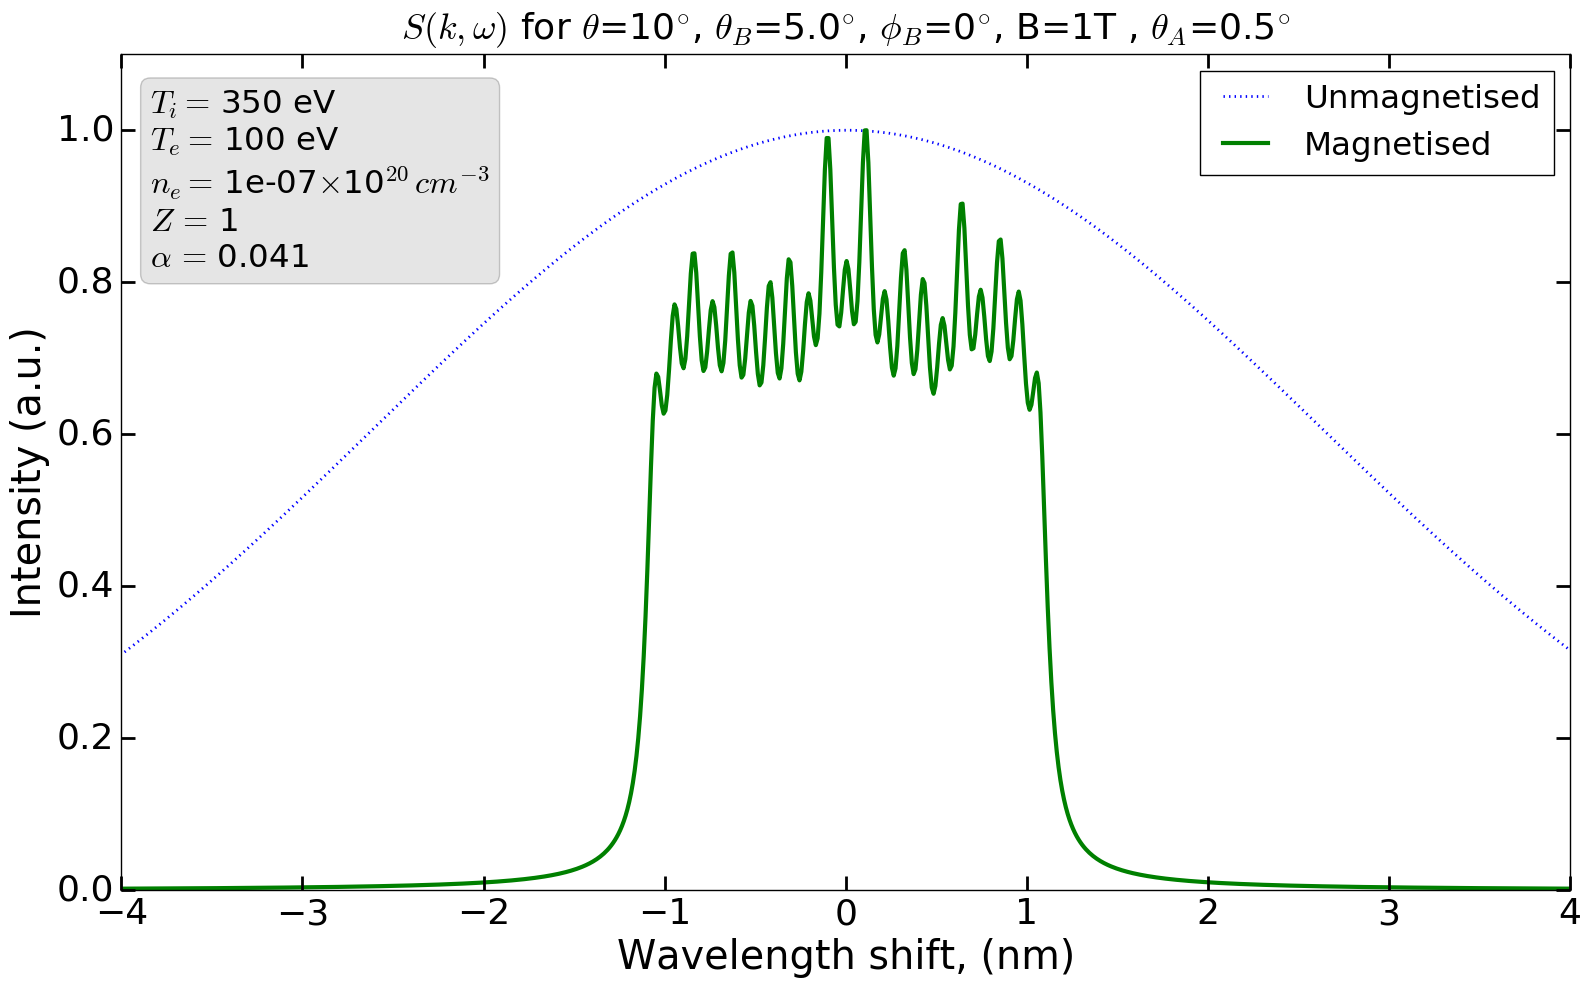

In [9]:
text_mul=1.3
fig,ax=plt.subplots(figsize=(16,10))
wl_Angs=1e9*(l-l.mean())#the wavelength range, in angstroms, as a shift from the centre.
plt.plot(wl_Angs, skw, ':',lw=2, label='Unmagnetised')
plt.plot(wl_Angs, skw_mag,lw=3, label='Magnetised')

#For a plotting multiple parameter scans, call this multiple times, replacing skw_mag with other spectra. 
#Remember to update the label!
#for skw, b in zip(skw_mag, b_range):
#    plt.plot(wl_Angs, skw, lw=3,label='B='+str(b)+' T')

#plotting region
ax.set_ylim([0.0,1.1])
#sr=20 #x-range in angstroms to plot
ax.set_xlim([-4,4])
#ax.set_xticks(np.linspace(-sr,sr,sr+1))
ax.set_xlabel(r'Wavelength shift, (nm)',fontsize=22*text_mul)
ax.set_ylabel('Intensity (a.u.)',fontsize=22*text_mul)
ax.tick_params(labelsize=20*text_mul, pad=5, length=10, width=2)

#Quickly calculate alpha for the info-box
lambda_De=7.43*(T_e/n_e)**0.5 #in m
th=theta_0/180.0*np.pi
k=2.0**1.5*np.pi/l0*(1-np.cos(th))**0.5
alpha=np.abs(1/(k*lambda_De))
#makes strings from all the paramters for the info-box
ti = r'$T_i=\,$'+str(T_i)+' eV'
te = r'$T_e=\,$'+str(T_e)+' eV'
vfe = r'$V_{fe}=\,$'+str(v_fe)+r' $ms^{-1}$'
vfi = r'$V_{fi}=\,$'+str(v_fi)+r' $ms^{-1}$'
ne = r'$n_e=\,$'+str(n_e/1e20)+r'$\times$10$^{20}\,cm^{-3}$'
alp = r'$\alpha\,=\,$'+str(round_to_n(alpha, 2))
textstr= (ti+'\n'+te+'\n'
          +ne+'\n'
          +'$Z\,=\,$'+str(Z)+'\n'
          +alp)
# these are matplotlib.patch.Patch properties for the info-box
props = dict(boxstyle='round', facecolor='gray', alpha=0.2)
# place an info box in upper left in axes coords
ax.text(0.02, 0.96, textstr, transform=ax.transAxes, fontsize=18*text_mul,
        verticalalignment='top', bbox=props)

#Plot title
deg=r'$^{\circ} $'#little degree symbol 
th_st=r'$\theta$='+str(theta_0)+deg
thb_st=r'$\theta_B$='+str(thB)+deg
phb_st=r'$\phi_B$='+str(phB)+deg
ta_st=r'$\theta_A$='+str(theta_A)+deg
B_st='B='+str(B)+'T '
title=r'$S(k,\omega)$ for '+th_st+', '+thb_st+', '+phb_st+', '+B_st+', '+ta_st
ax.set_title(title,fontsize=20*text_mul, y=1.01)

#Plot legend
ax.legend(fontsize=18*text_mul)

plt.tight_layout()

In [49]:
fig.savefig('omega_turbulent_magnetic_ne_1e18.png')